In [1]:
%run utils.py
%run plots.py
%run parameters.py

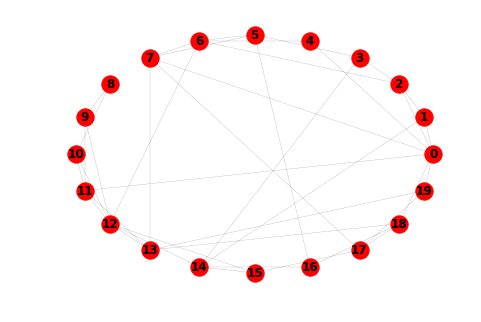

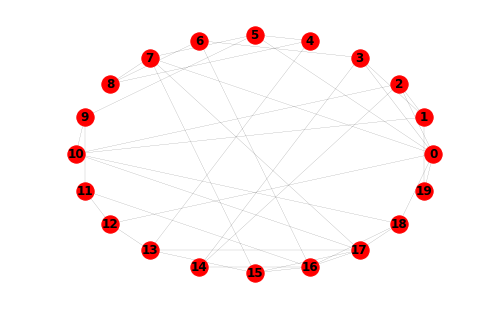

In [2]:
import copy
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# select probabilities test case
probs = probability_tests["test9"]

# select graph parameters
graph_params = copy.copy(graph_parameters)

# generate training and test samples
graphs_train, labels_train, graphs_test, labels_test = generate_dataset(probs, graph_params, True)

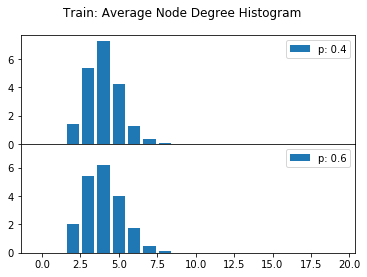

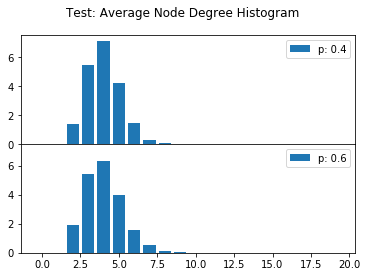

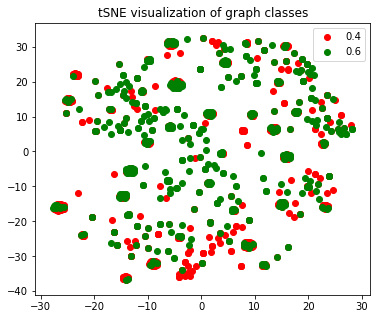

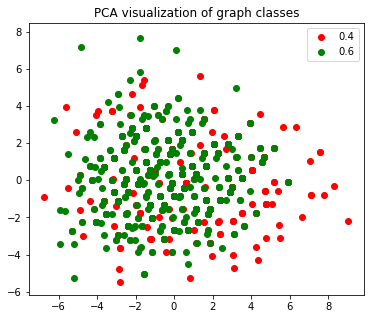

In [3]:
# feature engineering - node degree
X_train = []
X_test = []

for graph in graphs_train:
    hist_train = graph_to_degree_hist(graph)
    X_train.append(hist_train)
    
for graph in graphs_test:
    hist_test = graph_to_degree_hist(graph)
    X_test.append(hist_test)

# prepare data for training
train_X = np.array(X_train).reshape(-1, graph_params["num_nodes"]) # number of features
test_X = np.array(X_test).reshape(-1, graph_params["num_nodes"]) 
train_labels = np.array(labels_train)
test_labels = np.array(labels_test)
train_X, train_labels = unison_shuffled_copies(train_X, train_labels)
test_X, test_labels = unison_shuffled_copies(test_X, test_labels)

# plot histogram and 2-D visualizations
plot_degree_histograms(train_X, train_labels, "Train")
plot_degree_histograms(test_X, test_labels, "Test")
visualization(train_X, train_labels, method="tSNE")
visualization(train_X, train_labels, method="PCA")

In [4]:
%run classify.py

In [5]:
# select model
model = classifiers["svm"]
parameters = parameters_search["svm"]
clf = GridSearchCV(model, parameters)

# PCA
pca = PCA(n_components=0.99)
train_X_pca = pca.fit_transform(train_X)
test_X_pca = pca.transform(test_X)

# Training session 1
print(">>> no PCA")
clf.fit(train_X, train_labels)
train_predictions = clf.predict(train_X).reshape(-1,1)
test_predictions = clf.predict(test_X).reshape(-1,1)
print_results(np.ravel(train_predictions), train_labels, "Train Accuracy")
print_results(np.ravel(test_predictions), test_labels, "Test Accuracy")
print("best score: {} | best params: {}".format(clf.best_score_, clf.best_params_))

# Training session 2
print("\n>>> no PCA - log degree")
clf.fit(np.log(train_X+1), train_labels)
train_predictions = clf.predict(np.log(train_X+1)).reshape(-1,1)
test_predictions = clf.predict(np.log(test_X+1)).reshape(-1,1)
print_results(np.ravel(train_predictions), train_labels, "Train Accuracy")
print_results(np.ravel(test_predictions), test_labels, "Test Accuracy")
print("best score: {} | best params: {}".format(clf.best_score_, clf.best_params_))

# Training session 3
print("\n>>> PCA with 99% variance retained")
clf.fit(train_X_pca, train_labels)
train_predictions = clf.predict(train_X_pca).reshape(-1,1)
test_predictions = clf.predict(test_X_pca).reshape(-1,1)
print_results(np.ravel(train_predictions), train_labels, "Train Accuracy")
print_results(np.ravel(test_predictions), test_labels, "Test Accuracy")
print("best score: {} | best params: {}".format(clf.best_score_, clf.best_params_))

>>> no PCA
Train Accuracy: 0.653
Test Accuracy: 0.618
best score: 0.644 | best params: {'C': 0.1, 'kernel': 'rbf'}

>>> no PCA - log degree
Train Accuracy: 0.647
Test Accuracy: 0.621
best score: 0.655 | best params: {'C': 10, 'kernel': 'poly'}

>>> PCA with 99% variance retained
Train Accuracy: 0.67
Test Accuracy: 0.609
best score: 0.636 | best params: {'C': 0.1, 'kernel': 'rbf'}
